In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd 
import tensorflow as tf

In [3]:
df_Xor=pd.DataFrame({'X1':[0,0,1,1],'X2':[0,1,0,1],'y':[0,1,1,0]})
df_Xor

,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [4]:
Xd=np.asarray(df_Xor.iloc[:,0:2]) 
yd=np.reshape(np.asarray([df_Xor.iloc[:,2]]),[4,1])

In [5]:
x1 = np.float32(np.array([np.random.uniform(-0.5,1.5) for i in range(10000)]))
x2 = np.float32(np.array([np.random.uniform(-0.5,1.5) for i in range(10000)]))
Xk = np.array([[x1[i],x2[i]] for i in range(len(x1))])

In [6]:
input_size=2
hidden_layers=2
output_size=1

In [7]:
x=tf.placeholder(tf.float32,shape=[None,input_size])
y=tf.placeholder(tf.float32,shape=[None,output_size])


In [8]:
W1=tf.Variable(tf.random_uniform([input_size,hidden_layers])) 
W2=tf.Variable(tf.random_uniform([hidden_layers,output_size])) 
b1=tf.Variable(tf.zeros([hidden_layers])) 
b2=tf.Variable(tf.zeros([output_size]))

In [9]:
ini=tf.global_variables_initializer() 
sess=tf.InteractiveSession()
sess.run(ini)

In [10]:
z1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 

In [11]:
z2=tf.sigmoid(tf.add(tf.matmul(z1,W2),b2))

In [12]:
lossfn= tf.reduce_mean(( (y * tf.log(z2)) +  
  ((1 - y) * tf.log(1.0 - z2)) ) * -1) # cross entropy

In [13]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(lossfn)

In [14]:
ini=tf.global_variables_initializer() 

In [15]:
with tf.Session() as sess:
    corrpred=tf.equal(tf.round(z2),y)
    acc=tf.reduce_mean(tf.cast(corrpred,tf.float32))
    #print(sess.run(acc,feed_dict={x:Xd,y:yd}))

In [16]:
sess.run(ini)
#while (sess.run(acc,feed_dict={x: Xd,y: yd})) != 1.0:
#    sess.run(train_step,feed_dict={x: Xd, y: yd})

for i in range(100000):
    sess.run(train_step, feed_dict={x: Xd, y: yd})    

In [17]:
#sess.run(b1)

In [18]:
correct_prediction = tf.equal(tf.round(z2),y) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: Xd, y: yd})) # las corremos

1.0


In [19]:
#a=sess.run(W1,feed_dict={x:Xd,y:yd})
#a

In [60]:
#sess.run(b1,feed_dict={x:Xd,y:yd})[0]+sess.run(W1,feed_dict={x:Xd,y:yd})[0]

In [61]:
#W1=[sess.run(b1,feed_dict={x:Xd,y:yd})[0]]+[i[0] for i in sess.run(W1,feed_dict={x:Xd,y:yd})]
#W2=[sess.run(b2,feed_dict={x:Xd,y:yd})[0]]+[i[0] for i in sess.run(W2,feed_dict={x:Xd,y:yd})]

**predicción**

In [20]:
zz1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 

In [21]:
zz2=tf.sigmoid(tf.add(tf.matmul(zz1,W2),b2))

In [22]:
sess.run(zz2,feed_dict={x:Xd})

array([[ 0.02179728],
       [ 0.98269457],
       [ 0.98278081],
       [ 0.01922916]], dtype=float32)

In [23]:
w1=sess.run(W1)[0] 
w2=sess.run(W1)[1]
b=sess.run(b1)

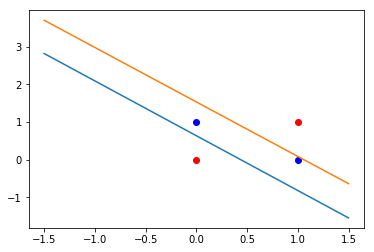

In [24]:
plt.scatter(df_Xor[df_Xor['y']==1]['X1'],df_Xor[df_Xor['y']==1]['X2'],color='blue') 
plt.scatter(df_Xor[df_Xor['y']==0]['X1'],df_Xor[df_Xor['y']==0]['X2'],color='red')
x=np.linspace(-1.5,1.5,10)
#plt.plot(x,-(w2[0,0]/w2[2,0])-(w2[1,0]/w2[2,0])*x) 

plt.plot(x,-(b[0]/w1[1])-(w1[0]/w1[1])*x) 
plt.plot(x,-(b[1]/w2[1])-(w2[0]/w2[1])*x)

In [25]:
#sess.run(b1)

In [26]:
#sess.run(W1)

**Varios puntos....**

In [27]:
zw1=tf.sigmoid(tf.add(tf.matmul(Xk,W1),b1)) 
zw2=tf.sigmoid(tf.add(tf.matmul(zw1,W2),b2))

In [28]:
zx=sess.run(zw2)

In [29]:
zx

array([[ 0.96398169],
       [ 0.89975053],
       [ 0.01069446],
       ..., 
       [ 0.00793894],
       [ 0.01697125],
       [ 0.93114704]], dtype=float32)

In [30]:
dd=np.round(zx)
np.sum(dd)

4763.0

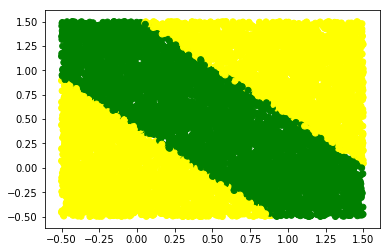

In [31]:
plt.scatter(Xk[:,0],Xk[:,1],color=['green' if i==1 else 'yellow' for i in dd]) 

# CIRCULO

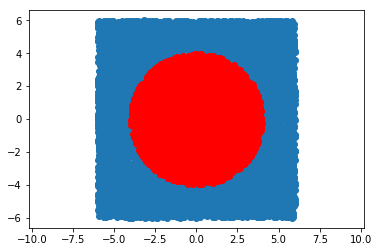

In [68]:

x1 = np.array([np.random.uniform(-6,6) for i in range(10000)])
x2 = np.array([np.random.uniform(-6,6) for i in range(10000)])

dat=pd.DataFrame(x1,columns=['x1'])
dat['x2']=x2 
dat['x1cuad']=dat['x1']**2
dat['x2cuad']=dat['x1']**2
dat['y']=(dat['x1']**2+dat['x2']**2).apply(lambda x: 1 if x<=16 else 0)
dat

plt.scatter(dat['x1'],dat['x2'])
plt.scatter(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='red')
plt.axis("equal")
#plt.plot(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='green')

Xq=np.asarray(dat[['x1','x2','x1cuad','x2cuad']]) 
#X=np.concatenate((np.ones((X.shape[0],1)), X), 1)
yq=np.asarray(dat[['y']])

In [43]:
input_size=4
hidden_layers=3
output_size=1

In [44]:
x=tf.placeholder(tf.float32,shape=[None,input_size])
y=tf.placeholder(tf.float32,shape=[None,output_size])

In [45]:
W1=tf.Variable(tf.random_uniform([input_size,hidden_layers])) 
W2=tf.Variable(tf.random_uniform([hidden_layers,output_size])) 
b1=tf.Variable(tf.zeros([hidden_layers])) 
b2=tf.Variable(tf.zeros([output_size]))

In [46]:
ini=tf.global_variables_initializer() 
sess=tf.InteractiveSession()
sess.run(ini)

In [47]:
z1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 

In [48]:
z2=tf.sigmoid(tf.add(tf.matmul(z1,W2),b2))

In [49]:
lossfn= tf.reduce_mean(( (y * tf.log(z2)) +  
  ((1 - y) * tf.log(1.0 - z2)) ) * -1) # cross entropy

In [50]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(lossfn)

In [51]:
ini=tf.global_variables_initializer() 

In [52]:
with tf.Session() as sess:
    corrpred=tf.equal(tf.round(z2),y)
    acc=tf.reduce_mean(tf.cast(corrpred,tf.float32))
    #print(sess.run(acc,feed_dict={x:Xd,y:yd}))

In [53]:
sess.run(ini)
#while (sess.run(acc,feed_dict={x: Xd,y: yd})) != 1.0:
#    sess.run(train_step,feed_dict={x: Xd, y: yd})

for i in range(100000):
    sess.run(train_step, feed_dict={x: Xq, y: yq})  

In [55]:
correct_prediction = tf.equal(tf.round(z2),y) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: Xq, y: yq})) # las corremos

0.9835


**Prediccion**

In [56]:
zz1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 

In [57]:
zz2=tf.sigmoid(tf.add(tf.matmul(zz1,W2),b2))

In [62]:
zx=sess.run(zz2,feed_dict={x:Xq})

In [63]:
zx

array([[  7.87409663e-01],
       [  2.54354715e-01],
       [  1.78066660e-02],
       ..., 
       [  4.92785824e-04],
       [  9.95385587e-01],
       [  9.97407377e-01]], dtype=float32)

In [64]:
dd=np.round(zx)
np.sum(dd)

3435.0

(-6.6084591074582901,
 6.6063766950321039,
 -6.6149313872776636,
 6.6140441264928977)

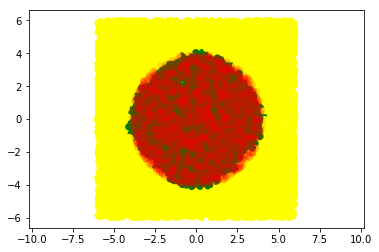

In [67]:
plt.scatter(dat['x1'],dat['x2'],color=['green' if i==1 else 'yellow' for i in dd]) 
plt.scatter(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='red',alpha=0.1)
plt.axis("equal")